# Internal units

We can chose the relation between $M_{in}$ and $M_{cgs}$, as well as the relation between $r_{in}$ and $r_{cgs}$.
This fixes the relation between $v_{in}$ and $v_{cgs}$.

$\frac{M_{cgs}}{M_{in}}= M_\odot$

$\frac{r_{cgs}}{r_{in}} = AU $

In [23]:
m_sun = 2e33 # g
au = 1.5e13 # cm
G = 6.673e-8 # cm^3 g^(-1) s^(-2)

Since

$$
    \frac{G_{cgs}M_{cgs}}{r_{cgs}v^2_{cgs}}=\frac{M_{in}}{r_{in}v^2_{in}}
$$

$$
    v_{in} = v_{cgs} \left( \frac{M_{in}r_{cgs}}{G_{cgs}M_{cgs}r_{in}} \right)^{\frac{1}{2}}
$$

We can call 
$$
    \frac{1}{q} = \left( \frac{M_{in}r_{cgs}}{G_{cgs}M_{cgs}r_{in}} \right)^{\frac{1}{2}}
$$  

so that $\frac{v_{cgs}}{v_{in}} = q $.

In [24]:
q = (au/(G*m_sun))**(-0.5)
print("q =", q)

q = 2982839.8102032454


# Initial conditions

In [25]:
import numpy as np

In [26]:
a = 1 #semi-major axis
e = 0.3 #eccentricity
m1 = 0.25
m2 = 0.75 

M = m1 + m2
mu = m1*m2/M

From the conservation of energy 

$$
    E_{tot} = - \frac{GM\mu}{2a}
$$

$$
    E_{tot} = E_{apo} = - \frac{GM\mu}{r_{apo}} + \frac{1}{2}\mu v_{tan}^2
$$

We can recover $v_{tan}$

$$
    v_{tan} = \sqrt{-\frac{GM}{a} + \frac{2GM}{r_{apo}}}
$$

and compute the initial conditions for the masses

$$
    \vec{x}_{1,0} = \left [ r_a \left ( \frac{M_2}{M} \right ), 0, 0\right ]
$$
$$
    \vec{x}_{2,0} = \left [ -r_a \left ( \frac{M_1}{M} \right ), 0, 0\right ]
$$
$$
    \vec{v}_{1,0} = \left [ 0, v_{tan} \left ( \frac{M_2}{M} \right ), 0\right ]
$$
$$
    \vec{v}_{2,0} = \left [ 0, -v_{tan} \left ( \frac{M_1}{M} \right ), 0\right ]
$$

In [27]:
r_a = a*(1+e) #apocenter
v_tan = np.sqrt(-M/a + 2*M/r_a) #tangential velocity of the reduced mass at the apocenter

In [28]:
x10 = r_a*m2/M #starting x of m1
x20 = -r_a*m1/M #starting x of m2

v10 = v_tan*m2/M #starting v_y of m1
v20 = -v_tan*m1/M #starting v_y of m2

print(x10, x20, v10, v20)

0.9750000000000001 -0.325 0.5503495392790071 -0.1834498464263357


# Create a file with the initial condition

In [29]:
# open the file
file = open('init_cond.txt', 'w')

# write to the file
file.write('2\n')
file.write('0\n')
file.write(f'{m1} {x10} {0} {0} {0} {v10} {0}\n')
file.write(f'{m2} {x20} {0} {0} {0} {v20} {0}\n')

# close the file
file.close()

# Run the simulation

To decide for how much time we have to run the simulation, we can use Kepler's third law to compute the period of one orbit.

$$
    \frac{a^3}{T^2} = \frac{GM}{4\pi^2}
$$

We recover $T$

$$
    T = \sqrt{\frac{4\pi^2 a^3}{GM}}
$$

Then we run the simulation for a multiple of the orbital period.

In [30]:
T = np.sqrt(4*np.pi**2*a**3/M) 
print("The orbital period is", T) 
print(5*T)

The orbital period is 6.283185307179586
31.41592653589793


In [31]:
# We run the following line in the terminal
# ./nbody_sh1 -d 0.03 -o 0.01 -t 31.41592653589793 < init_cond.txt > output.txt

# Analysis of the results

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [33]:
# File with the data i want to proces
filename = "output.txt"

def append_to_lists(line, list1, list2, list3, list4, list5, list6):
    columns = line.strip().split() # split line into columns using space as delimiter
    list1.append(columns[1])
    list2.append(columns[2])
    list3.append(columns[3])
    list4.append(columns[4])
    list5.append(columns[5])
    list6.append(columns[6])

In [34]:
# Data i want to plot 
time = []
x1 = []
y1 = []
z1 = []
vx1 = []
vy1 = []
vz1 = []
x2 = []
y2 = []
z2 = []
vx2 = []
vy2 = []
vz2 = []

try:
    with open(filename, 'r') as f:
        lines = f.readlines()
    counter = 0
    for line in lines:
        counter += 1
        if counter % 4 ==2:
            #process second line here
            element = line.strip().split()[0]
            time.append(element)
        elif counter % 4 == 3:
            # process third line here
            append_to_lists(line, x1, y1, z1, vx1, vy1, vz1)
        elif counter % 4 == 0:
            # process fourth line here
            append_to_lists(line, x2, y2, z2, vx2, vy2, vz2)
except FileNotFoundError:
    print(f"File {filename} not found.")

In [35]:
# Converting the arrays in arrays of floats
time = np.array(time).astype(float)
x1 = np.array(x1).astype(float)
y1 = np.array(y1).astype(float)
z1 = np.array(z1).astype(float)
vx1 = np.array(vx1).astype(float)
vy1 = np.array(vy1).astype(float)
vz1 = np.array(vz1).astype(float)
x2 = np.array(x2).astype(float)
y2 = np.array(y2).astype(float)
z2 = np.array(z2).astype(float)
vx2 = np.array(vx2).astype(float)
vy2 = np.array(vy2).astype(float)
vz2 = np.array(vz2).astype(float)

In [36]:
r1 = (x1**2 + y1**2 +z1**2)**0.5
r2 = (x2**2 + y2**2 +z2**2)**0.5

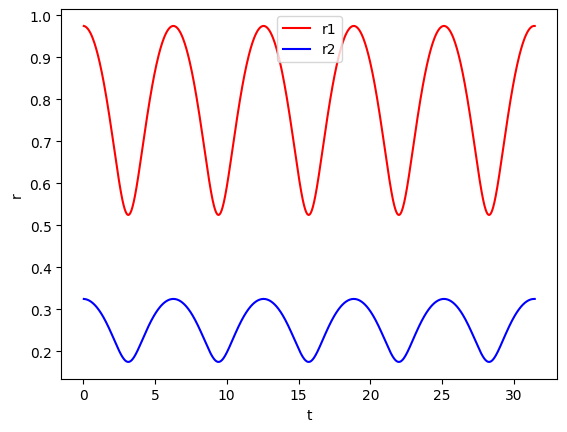

In [37]:
# Generating plot of r1 and r2 as function of time

plt.plot(time, r1, color="red", label="r1")
plt.plot(time, r2, color="blue", label="r2")
plt.xlabel('t')
plt.ylabel('r')
plt.legend()
plt.show()

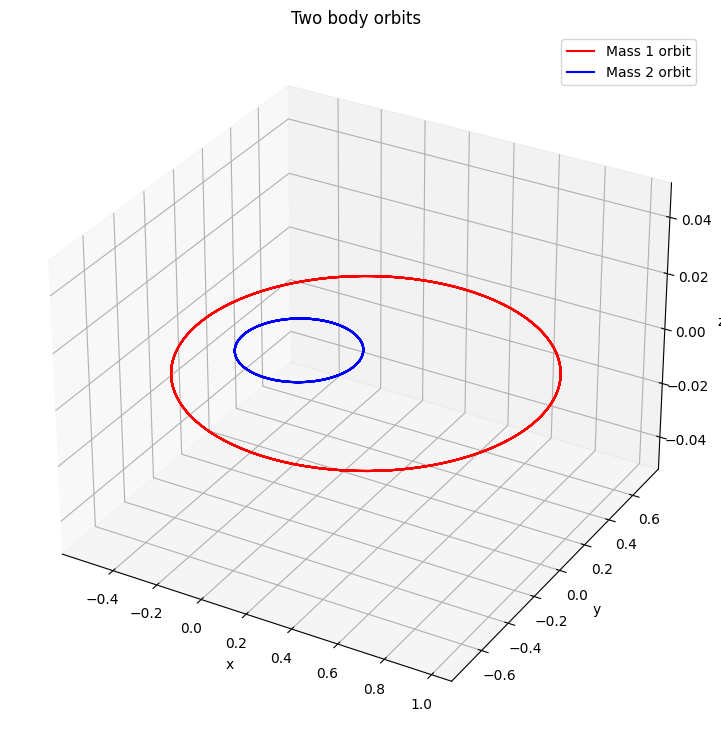

In [38]:
# Generating 3D plot

fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1, y1, z1, c = 'r', label = 'Mass 1 orbit')
ax.plot(x2, y2, z1,  c = 'b', label = 'Mass 2 orbit')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Two body orbits")
plt.legend()
plt.show()

# Checking the result

In [39]:
# Checking the eccentricities of the orbits

e1 = (r1.max()-r1.min())/(r1.max()+r1.min())
e2 = (r2.max()-r2.min())/(r2.max()+r2.min())

print("The expected eccentricity is", e)
print("The eccentricity of the orbit of the first object is", e1)
print("The eccentricity of the orbit of the second object is", e2)

The expected eccentricity is 0.3
The eccentricity of the orbit of the first object is 0.29999045212827974
The eccentricity of the orbit of the second object is 0.2999904521282958


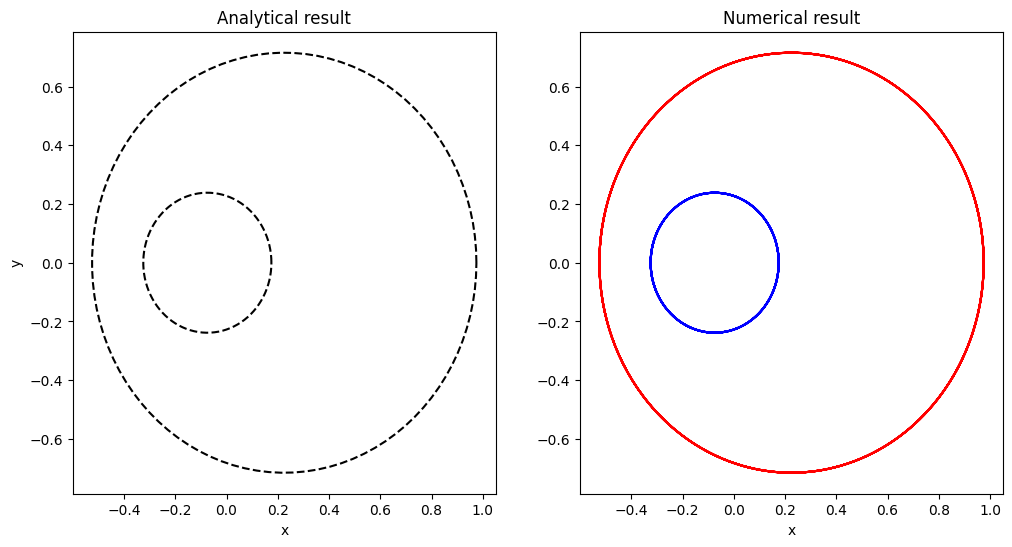

In [40]:
# Showing the same plot from the analytical result, using the equation of an ellipse

tdraw = np.linspace(0, 2*np.pi, 100)

# Center of the ellipse for m1
x_c1 = m2/M*(r_a - a)
y_c1 = 0

# Center of the ellipse for m2
x_c2 = -m1/M*(r_a - a)
y_c2 = 0

a1 = x10/(1+e)
a2 = -x20/(1+e)
b1 = a1*np.sqrt(1-e**2)
b2 = a2*np.sqrt(1-e**2)

# Parametric equations of an ellipse not centered in the origin
# x = x_c + cos(t)
# y = y_c + sin(t)

plt.subplots(1,2, figsize=(12,6))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.title("Analytical result")
plt.plot(x_c1 + a1*np.cos(tdraw), b1*np.sin(tdraw), color="black", linestyle='--')
plt.plot(x_c2 + a2*np.cos(tdraw), b2*np.sin(tdraw), color="black", linestyle='--')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2) # index 2
plt.title("Numerical result")
plt.plot(x1,y1,c="r")
plt.plot(x2,y2,c="b")
plt.xlabel('x')

plt.show()

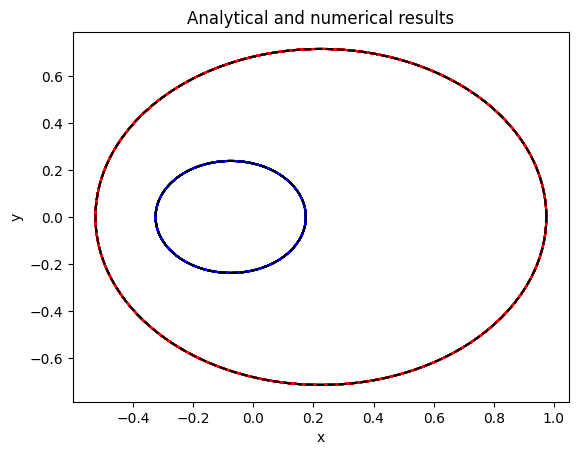

In [41]:
plt.title("Analytical and numerical results")
plt.plot(x1,y1,c="r")
plt.plot(x2,y2,c="b")
plt.plot(x_c1 + a1*np.cos(tdraw), b1*np.sin(tdraw), color="black", linestyle='--')
plt.plot(x_c2 + a2*np.cos(tdraw), b2*np.sin(tdraw), color="black", linestyle='--')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

## Animation

In [44]:
from matplotlib import animation

numDataPoints = len(time)

def update(num):
    #print(f"{num} ", end="")
    
    ax.clear()  # Clears the figure to update the line, point,   
                # title, and axes    # Updating Trajectory Line (num+1 due to Python indexing)
    ax.plot3D(x1[:num+1], y1[:num+1], 
              z1[:num+1])              # Updating Point Location
    ax.plot3D(x2[:num+1], y2[:num+1], 
              z2[:num+1], c='red')
    ax.scatter(x1[num], y1[num], z1[num], 
               c='black', marker='o')    # Adding Constant Origin
    ax.scatter(x2[num], y2[num], z2[num], 
               c='black', marker='o')    # Adding Constant Origin
    
    #ax.plot3D(x_1[0], y_1[0], z_1[0], marker='o', c='black')    # Setting Axes Limits
    #ax.plot3D(x_2[0], y_2[0], z_2[0], marker='o', c='black')    # Setting Axes Limits
    
    #ax.set_xlim3d([-.6, .6])
    #ax.set_ylim3d([-.6, .6])
    #ax.set_zlim3d([0, 5])

    # Adding Figure Labels
    #ax.set_title('Trajectory \nTime = ' + str(np.round(t[num],    
                 #decimals=2)) + ' sec')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$');

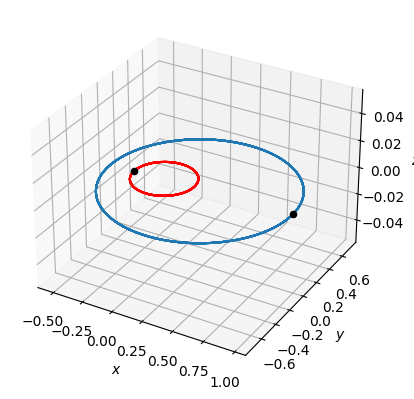

In [46]:
## Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
line_ani = animation.FuncAnimation(fig, update, interval=5,   
                                   frames=numDataPoints)

# Saving the Animation
f = r"animation1.gif"
writergif = animation.PillowWriter(fps=60)
line_ani.save(f, writer=writergif)

plt.show()

# Accuracy parameter analysis

The progran was run for different values of the accuracy parameter through a script to check which value was more suitable for our simulation. To quantify the performance of the code we used the difference between the numerical value of the eccentricity of the orbit of $M_1$ and its known value.

In [42]:
d = np.array([0.0001, 0.000325, 0.00055, 0.000775, 0.0001, 0.000325, 0.00055, 0.000775, 0.001, 0.03778947, 0.07457895, 0.11136842, 0.14815789, 
             0.18494737, 0.22173684, 0.25852632, 0.29531579, 0.33210526])

ecc1 = np.array([0.2999991804935934, 0.29999918310207485, 0.2999991863661666, 0.2999991822086054, 0.29999921462474005, 0.29999936742511113, 0.29999942490610537, 0.2999994806660915, 0.29999942490610537,
                 0.29999965144787344, 0.29998184485429813, 0.29979904274021146, 0.2997977527309082, 0.29963774838045637,
                 0.2995116745217239, 0.29919389632617, 0.2986467410484064, 0.29817216032857896])

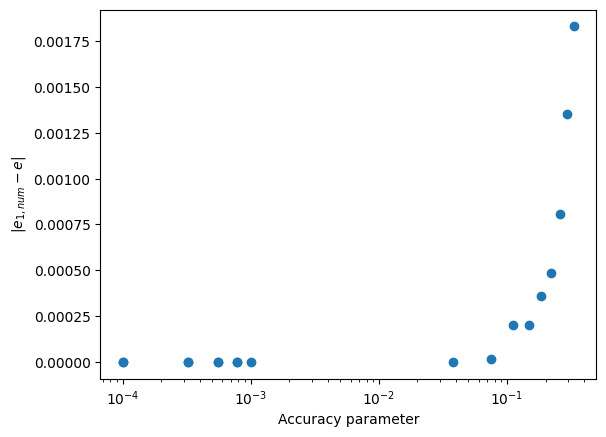

In [43]:
err = np.abs(ecc1 - e)

plt.scatter(d,err)
plt.xscale('log')
plt.xlabel('Accuracy parameter')
plt.ylabel('$|e_{1,num}-e|$')
plt.show()

In [ ]:
sorted_indices = np.argsort(err) # sorting the indices
index_min = sorted_indices[0]

print("The value of the accuracy parameter for which we have the lowest error is", d[index_min])